In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [68]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [69]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [71]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [72]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

In [73]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


It seems there are no null or empty cells in the data

All continious columns seem to have a normal distribution

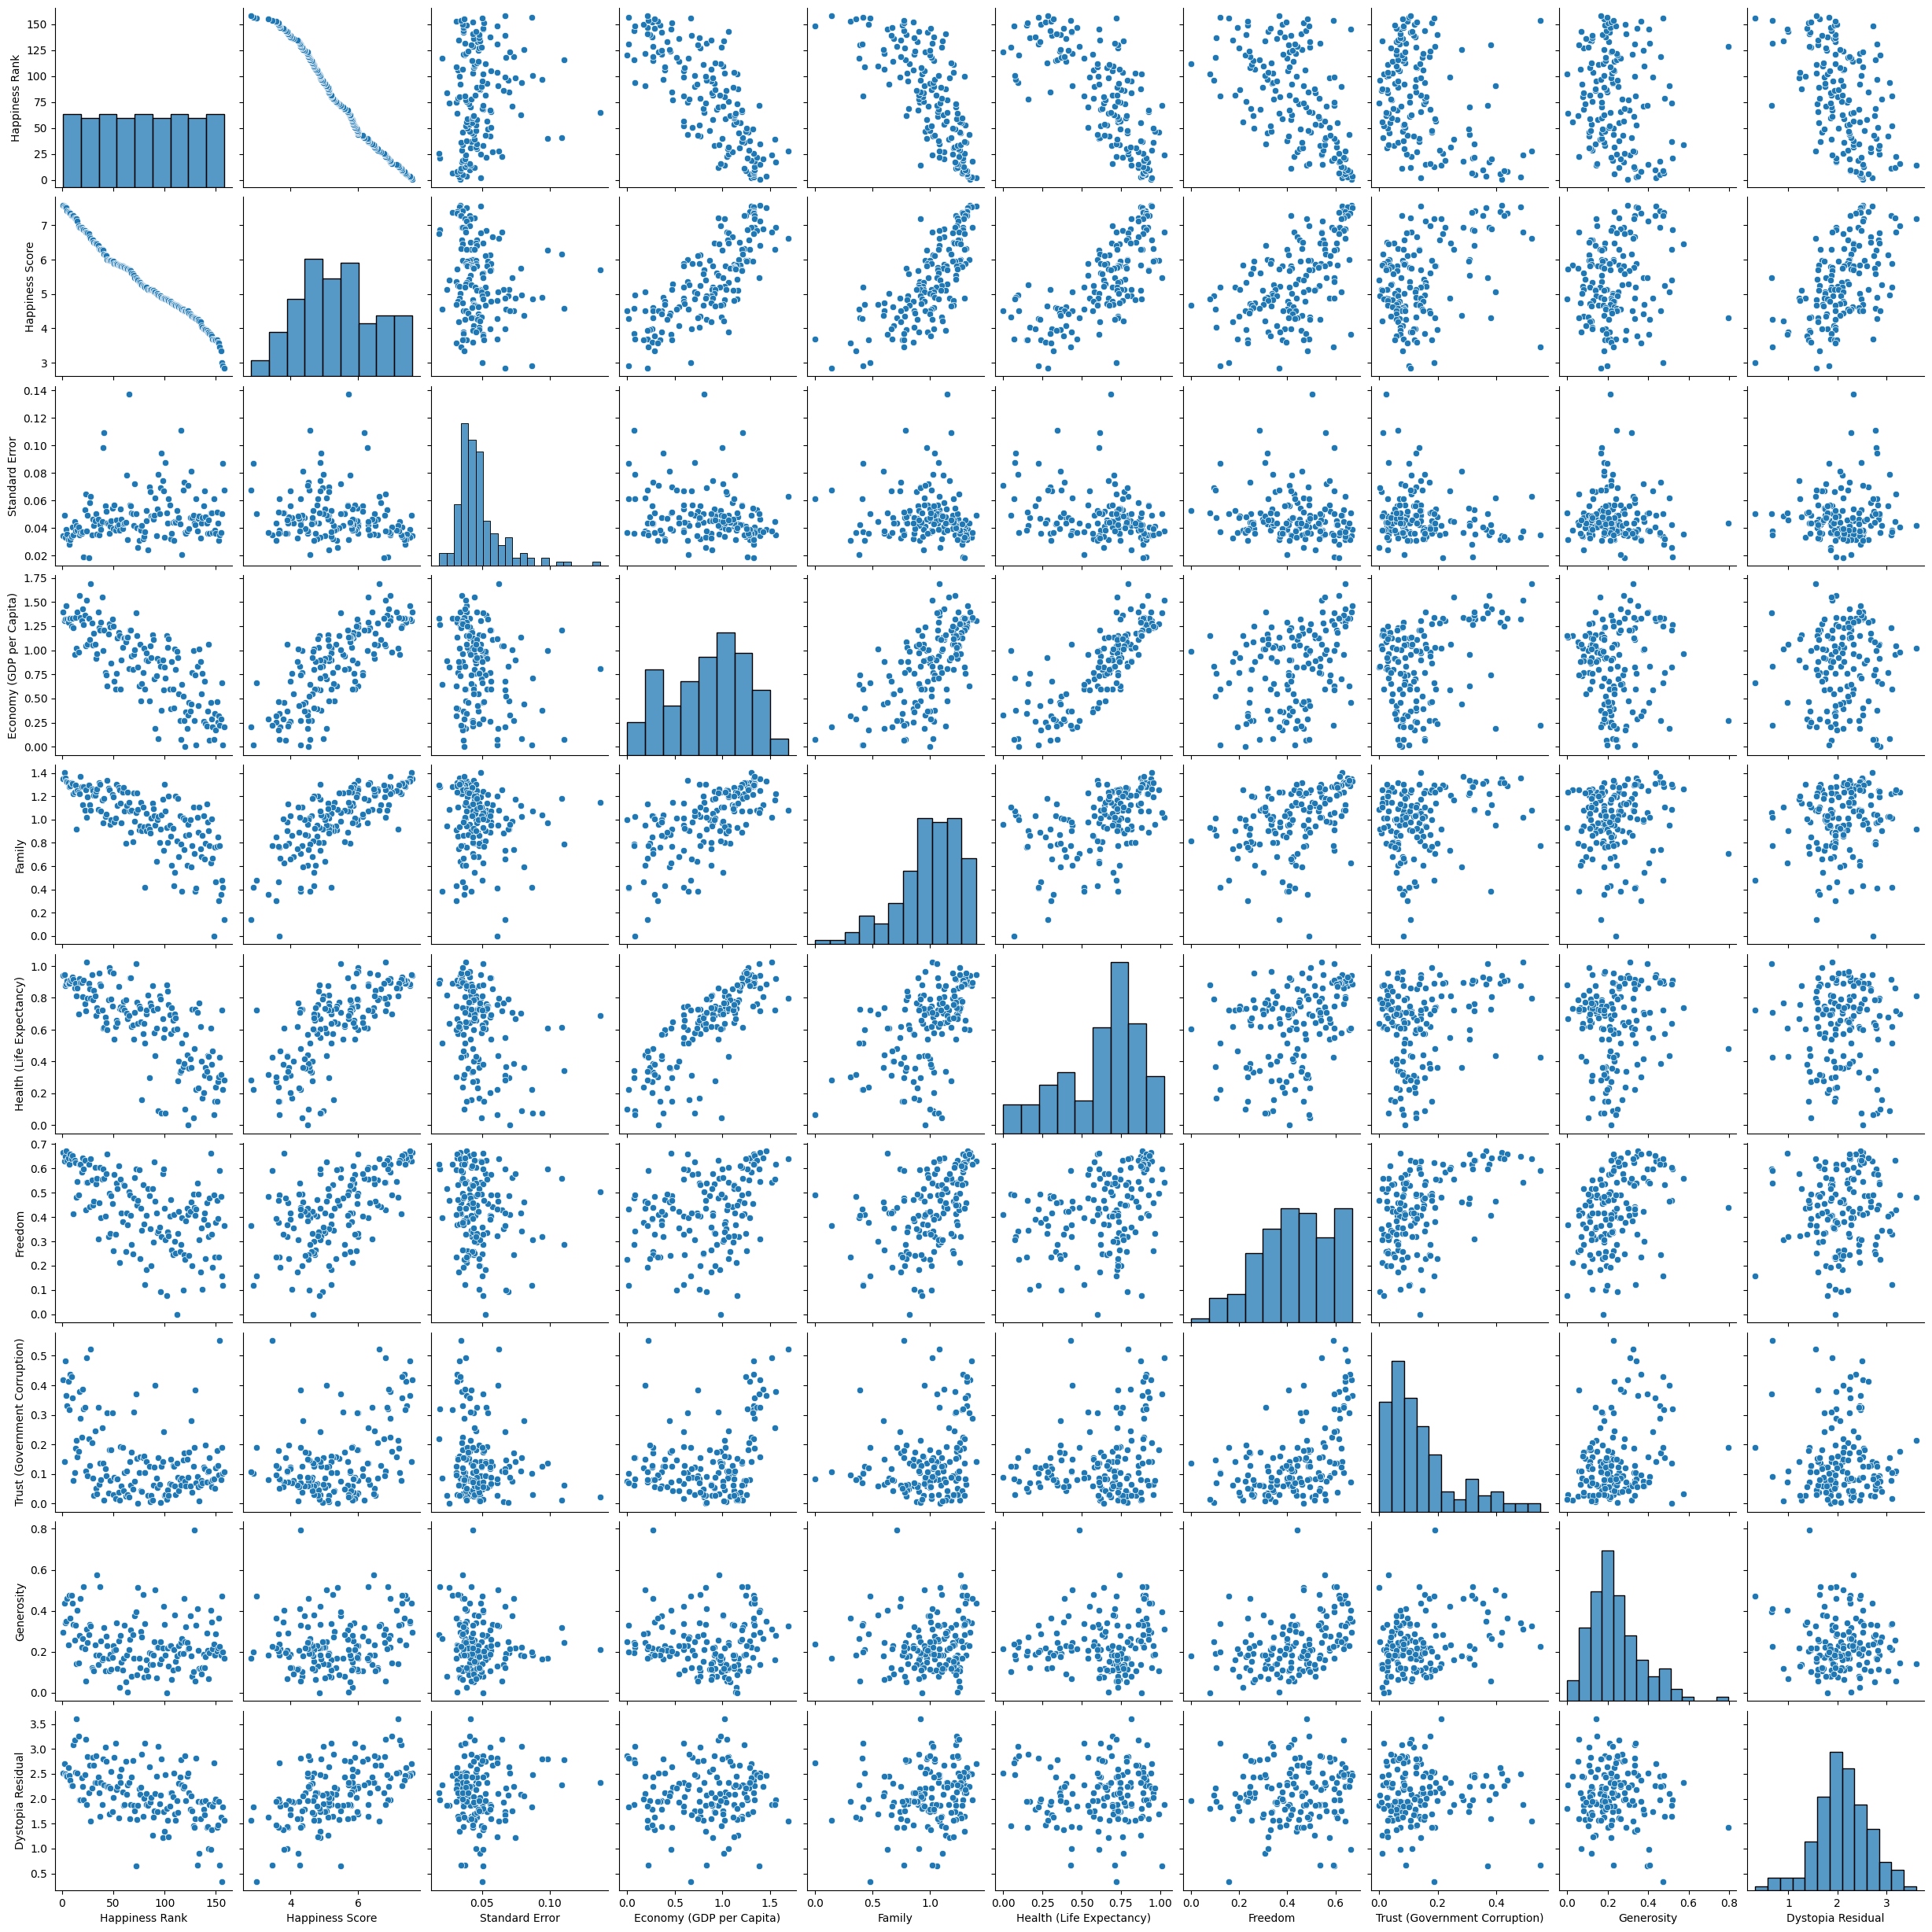

In [74]:
sns.pairplot(data=data)

Health, Economy, Freedom have the strongest relationship with the score

Family and trust have a relationship to some extent

The Rank is just a number that changes based on the score so although strongly related, it will not help us in this analysis or modelling

Standard error is also another column that seem to be unhelpful, given the weak relationship

In [75]:
data.drop('Happiness Rank', axis =1, inplace=True)

<Axes: >

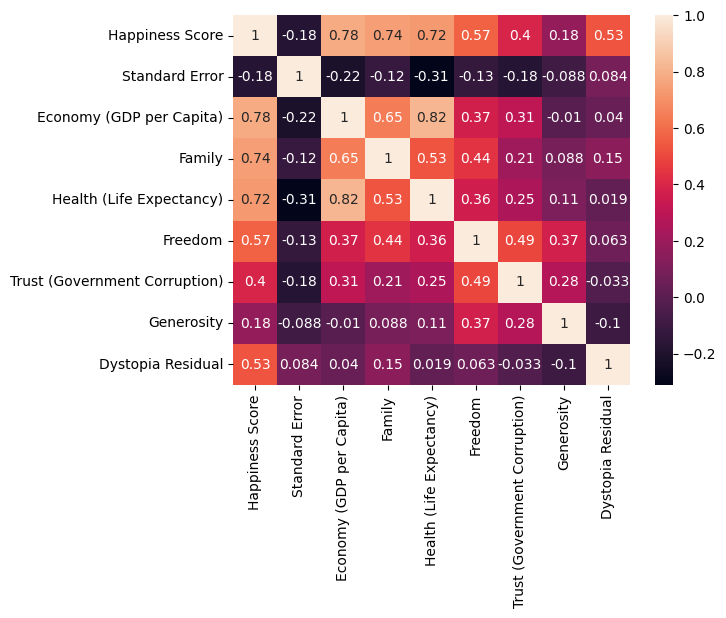

In [76]:
sns.heatmap(data.corr(), annot = True)

Economy seem to be strongly related to health and family, but since all these three features have strong relationship with the target, they might be too important to remove

as observed previously, Standard Error can be dropped as it does not play an important role

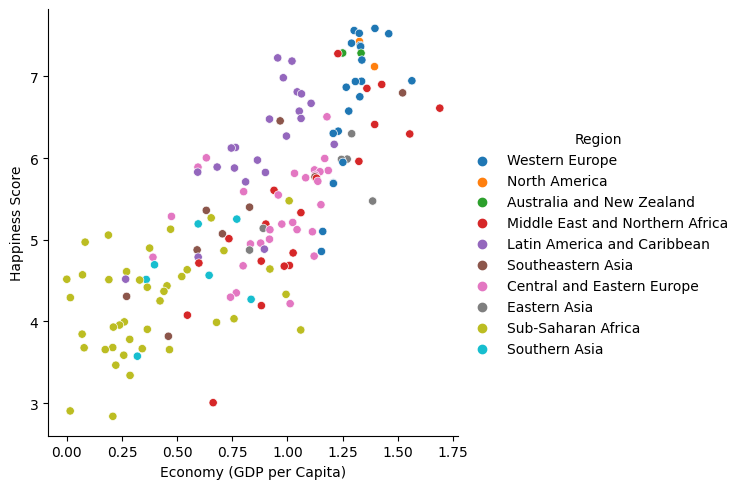

In [77]:
sns.relplot(data=data , x = 'Economy (GDP per Capita)', y = 'Happiness Score', hue='Region')

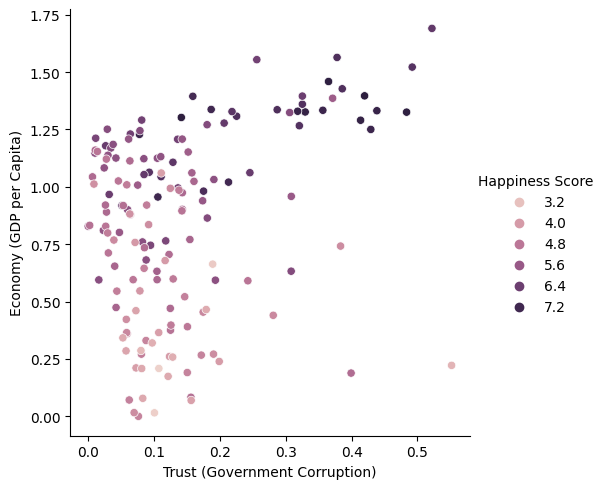

In [78]:
sns.relplot(data=data , x = 'Trust (Government Corruption)', y = 'Economy (GDP per Capita)', hue='Happiness Score')

It seems Trust is not a big factor in poor countries and it starts to play a role if the economy is already good

In [79]:
continuous_cols = []

for col in data.columns:
  if data.dtypes[col] == 'float64':
    continuous_cols.append(col)


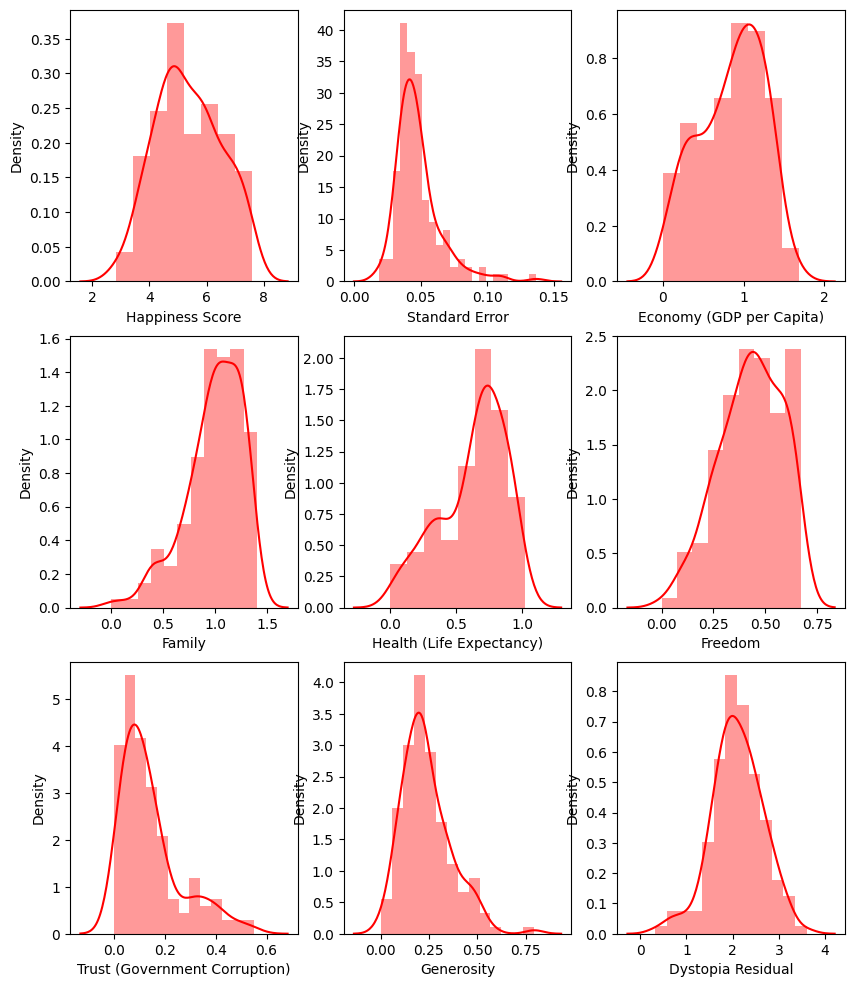

In [80]:
plt.figure(figsize = (10,12))
plotnumber = 1
for col in continuous_cols:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[col], color='r')
        plt.xlabel(col)
        plotnumber +=1

In [81]:
data[continuous_cols].skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

There is some skewness in Standard Error and Trust but the skewness is in acceptable range and we are planning to not use Standard Error in our modeling anyway

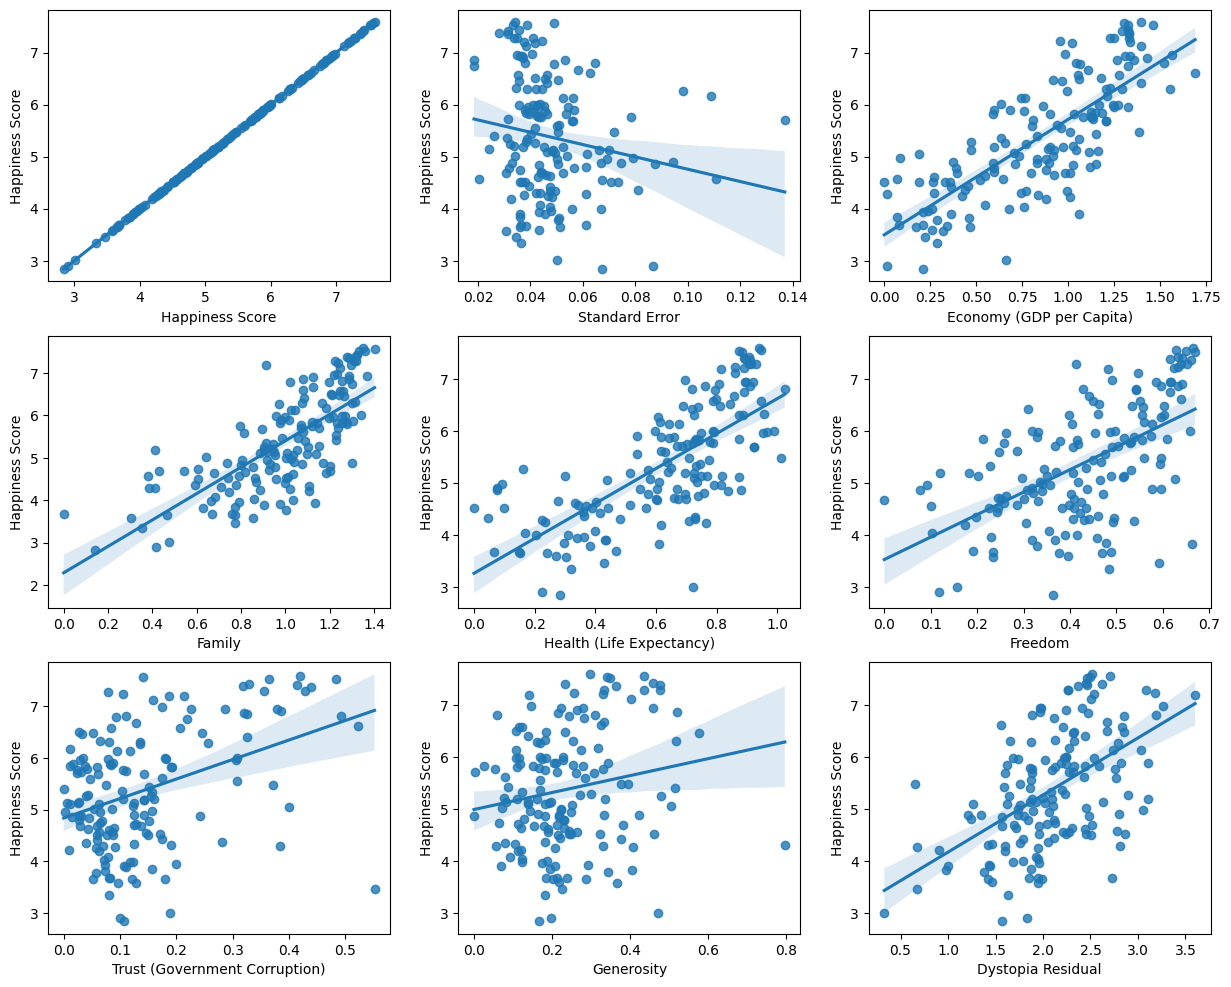

In [82]:
plt.figure(figsize = (15,12))
plotnumber = 1
for col in continuous_cols:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.regplot(x = col , y = 'Happiness Score' , data=data)
        plt.xlabel(col)
        plt.ylabel('Happiness Score')
        plotnumber +=1

Generosity and Trust don't seem to have a strong relation, but as observed before, in some countries they seem to matter, therefore we will keep them in

Although scores are generally higher in Western Europe region, the region and country is not going to help our modelling

we will also remove Dystopia residual from the features, because if we keep it, the score will simply be adding up all the features together.

In [83]:
data = data.sample(frac=1).reset_index(drop=True)

In [84]:
data.head()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Uruguay,Latin America and Caribbean,6.485,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142
1,Montenegro,Central and Eastern Europe,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017
2,North Cyprus,Western Europe,5.695,0.05635,1.20806,1.07008,0.92356,0.49027,0.14280,0.26169,1.59888
3,Austria,Western Europe,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
4,Ecuador,Latin America and Caribbean,5.975,0.04528,0.86402,0.99903,0.79075,0.48574,0.18090,0.11541,2.53942


In [125]:
x = data.drop(columns = ['Country','Region','Standard Error','Dystopia Residual','Happiness Score', 'Generosity'], axis=1)
y = data['Happiness Score']

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor as KNN


In [127]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)



---



In [128]:
MaxAccu = 0
MaxRS = 0
for i in range(1,300):
  x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=i)
  LR = LinearRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = r2_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Score:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Score: 0.8741224416769546 
 Best Random State: 122


In [129]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=MaxRS)

**Linear Regression**

In [130]:
LR = LinearRegression()
LR.fit(x_train,y_train)
LRpred = LR.predict(x_test)
LR_trainpred = LR.predict(x_train)
print('R2_score:', r2_score(y_test,LRpred))
print('R2_score for training data:', r2_score(y_train,LR_trainpred))
print('MAE:', mean_absolute_error(y_test, LRpred))
print('MSE:', mean_squared_error(y_test, LRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, LRpred)))

R2_score: 0.8741224416769546
R2_score for training data: 0.7234334311368146
MAE: 0.3314083717552217
MSE: 0.1797369568209338
RMSE: 0.5756807898090935


**Random Forest**

In [131]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
RFRpred = RFR.predict(x_test)
RFR_trainpred = RFR.predict(x_train)
print('R2_score:', r2_score(y_test,RFRpred))
print('R2_score for training data:', r2_score(y_train,RFR_trainpred))
print('MAE:', mean_absolute_error(y_test, RFRpred))
print('MSE:', mean_squared_error(y_test, RFRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, RFRpred)))

R2_score: 0.8719891154515269
R2_score for training data: 0.9506427406193518
MAE: 0.35687166666666653
MSE: 0.18278307217916653
RMSE: 0.5973873673477424


**KNN**

In [132]:
knn = KNN()
knn.fit(x_train,y_train)
knnpred = knn.predict(x_test)
knn_trainpred = knn.predict(x_train)
print('R2_score:', r2_score(y_test,knnpred))
print('R2_score for training data:', r2_score(y_train,knn_trainpred))
print('MAE:', mean_absolute_error(y_test, knnpred))
print('MSE:', mean_squared_error(y_test, knnpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, knnpred)))

R2_score: 0.8384850617162929
R2_score for training data: 0.8043399494226908
MAE: 0.39270000000000005
MSE: 0.23062255
RMSE: 0.626657801355732


**Gradient Boosting**

In [133]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBRpred = GBR.predict(x_test)
GBR_trainpred = GBR.predict(x_train)
print('R2_score:', r2_score(y_test,GBRpred))
print('R2_score for training data:', r2_score(y_train,GBR_trainpred))
print('MAE:', mean_absolute_error(y_test, GBRpred))
print('MSE:', mean_squared_error(y_test, GBRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, GBRpred)))

R2_score: 0.8468995996712302
R2_score for training data: 0.9831539552237135
MAE: 0.37505812305119407
MSE: 0.2186076724855083
RMSE: 0.6124198911296024


**Cross Validation**

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
score = cross_val_score(LR, x_scaled, y)
print(score)
print(score.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,LRpred)-score.mean())

[0.76507555 0.78860501 0.74223097 0.7658063  0.68400098]
0.7491437612743883
Difference Between score mean and R2score: 0.12497868040256632


In [136]:
score1 = cross_val_score(RFR, x, y)
print(score1)
print(score1.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,RFRpred)-score1.mean())

[0.71713945 0.77942733 0.78719847 0.71823285 0.61292791]
0.7229852018720477
Difference Between score mean and R2score: 0.14900391357947917


In [137]:
score2 = cross_val_score(knn, x, y)
print(score2)
print(score2.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,knnpred)-score2.mean())

[0.78391984 0.84804833 0.74342549 0.77477213 0.62617958]
0.755269073215039
Difference Between score mean and R2score: 0.08321598850125389


In [138]:
score3 = cross_val_score(GBR, x, y)
print(score3)
print(score3.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,GBRpred)-score3.mean())

[0.74224096 0.76894486 0.7272795  0.74020323 0.6323981 ]
0.7222133305412918
Difference Between score mean and R2score: 0.12468626912993841


Text(0.5, 1.0, 'KNN')

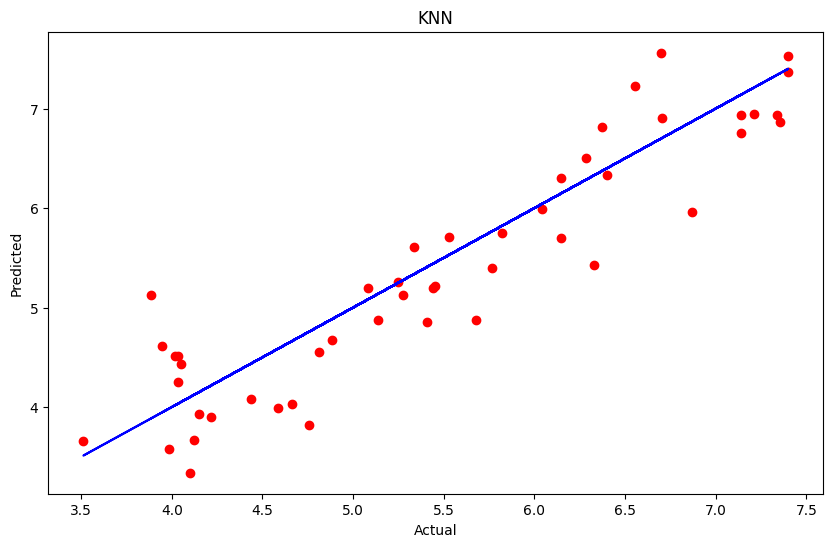

In [139]:
plt.figure(figsize=(10,6))
plt.scatter(x=knnpred,y=y_test,color='r')
plt.plot(knnpred,knnpred, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN')

**Hyperparameter Tuning**

In [140]:
from sklearn.model_selection import GridSearchCV

In [142]:
param = {'n_neighbors': range(3,9), 'weights':['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
gscv = GridSearchCV(knn,param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(3, 9),
                         'weights': ['uniform', 'distance']})

In [143]:
gscv.best_params_

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}

In [144]:
model = KNN(algorithm='auto', n_neighbors= 4, weights='uniform')
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('R2_score:', r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, pred)))

R2_score: 0.808474136070318
MAE: 0.43089062499999997
MSE: 0.2734742903645833
RMSE: 0.6564225963508569


In [145]:
df = pd.DataFrame()
actual = np.array(y_test)
df['Actual'] = actual
df['Prediction'] = pred

In [146]:
df

,Actual,Prediction
0,7.527,7.39075
1,6.298,6.25850
2,5.605,5.39800
3,5.192,5.73400
4,5.399,5.58700
5,6.750,7.14500
6,4.518,3.88275
7,6.940,7.32225
8,6.810,6.27150
9,5.124,5.35725


In [147]:
import joblib

In [148]:
joblib.dump(model,'Happiness_model.pk1')

['Happiness_model.pk1']